# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2021**

Мягкий дедлайн: **25.10.21 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **28.10.21 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`
Чтобы его найти, для начала надо найти дифференциал функции ошибки по $w$:
$$d_{w}*Q = d_{w}[(y-X{w})^{T}(y-X{w})] = d_{w}[(y-X{w})^{T}](y-X{w}) + (y-X{w})^{T}d_{w}[(y-X{w})] = 
d_{w}[(-X{w})^{T}](y-X{w}) - (y-X{w})^{T}Xd_{w} = -d{w}^{T}X^{T}(y-X{w})-(y-X{w})^{T}Xd{w} = -2(y-X{w})^{T}Xd{w}$$

Транспонируем $d{w}^{T}X^{T}(y-X{w})$ - как скаляр. Возьмем его производную и приравняем к нулю - найдем минимум для ${w}$. После ряда преобразований получим ${w} = (X^{T}X)^{-1}X^{T}y$. 

При решении системы делаем предположение что матрица $X^{T}X$ обратима. В случае отсутвия аналитического решения - точка оптиума будет находиться с помощью градиаентного спуска. Её шаг $ w_{t} = w_{t-1} + \gamma * 2 X^{T}(y - X{w}) $, где $\gamma$ - это скорость обучения.


По - итогу градиент MSE записывается как: 

$$\nabla Q(w) = 2X^T(Xw - y).$$


Так как матрица $X^{T}X$ обратима , то так как матрица Гессе положительно определена в точке градиент которой равен нулю - то есть точка локального минимума. Найдем 2-ю производную: $d_{w}[-2X^{T}(y-X{w})] = 2X^{T}Xd{w}$. 


Итого $\nabla^{2} Q(w) = 2X^TX.$





### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam.jpg)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np
from descents import get_descent

from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 12

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/29933/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/29933/run-report/55520222/

* **StochasticDescent**: https://contest.yandex.ru/contest/29933/run-report/55520277/

* **MomentumDescent**: https://contest.yandex.ru/contest/29933/run-report/55520400/

* **Adam**: https://contest.yandex.ru/contest/29933/run-report/55520438/

* **LinearRegression**: https://contest.yandex.ru/contest/29933/run-report/55520506/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# from descents import get_descent from linear_regression import LinearRegression #
sns.set(style='darkgrid')

In [7]:
import wget 
wget.download('https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2021-fall/homeworks-practice/homework-practice-03-gd/autos.csv', 
              'autos.csv')

100% [....................................................] 14767172 / 14767172

'autos (3).csv'

In [8]:
df = pd.read_csv('autos.csv')

In [9]:
df.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [10]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
binar = ['gearbox', 'notRepairedDamage']

# YOUR CODE (EDA):

In [11]:
print(df.shape[0])
df.info()

241190
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   brand              241190 non-null  object
 1   model              241190 non-null  object
 2   vehicleType        241190 non-null  object
 3   gearbox            241190 non-null  object
 4   fuelType           241190 non-null  object
 5   notRepairedDamage  241190 non-null  object
 6   powerPS            241190 non-null  int64 
 7   kilometer          241190 non-null  int64 
 8   autoAgeMonths      241190 non-null  int64 
 9   price              241190 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.4+ MB


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   brand              241190 non-null  object
 1   model              241190 non-null  object
 2   vehicleType        241190 non-null  object
 3   gearbox            241190 non-null  object
 4   fuelType           241190 non-null  object
 5   notRepairedDamage  241190 non-null  object
 6   powerPS            241190 non-null  int64 
 7   kilometer          241190 non-null  int64 
 8   autoAgeMonths      241190 non-null  int64 
 9   price              241190 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.4+ MB


/Users/alexanderskovorodko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


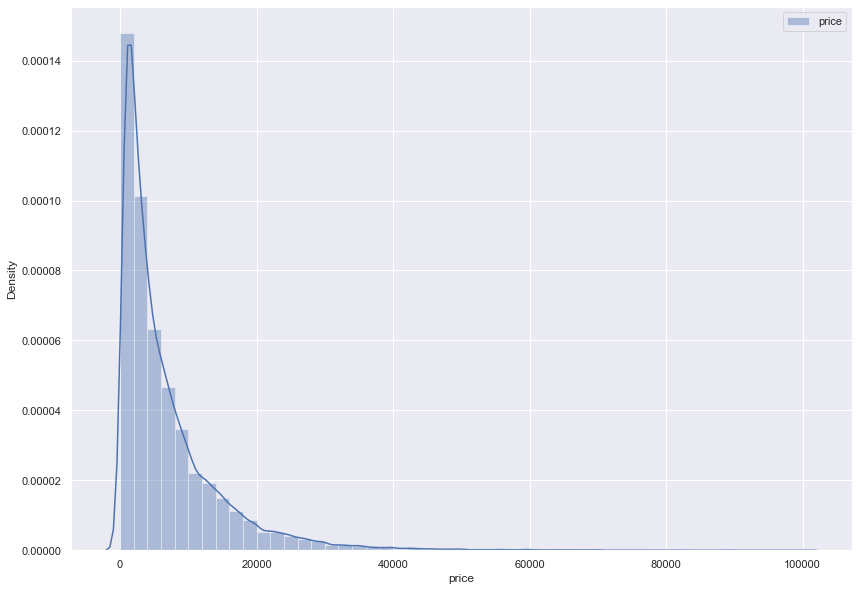

In [13]:
plt.figure(figsize=(14, 10))
sns.distplot(df['price'], label='price') 
plt.legend()

In [14]:
df['log_price'] = np.log1p(df.price)


/Users/alexanderskovorodko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


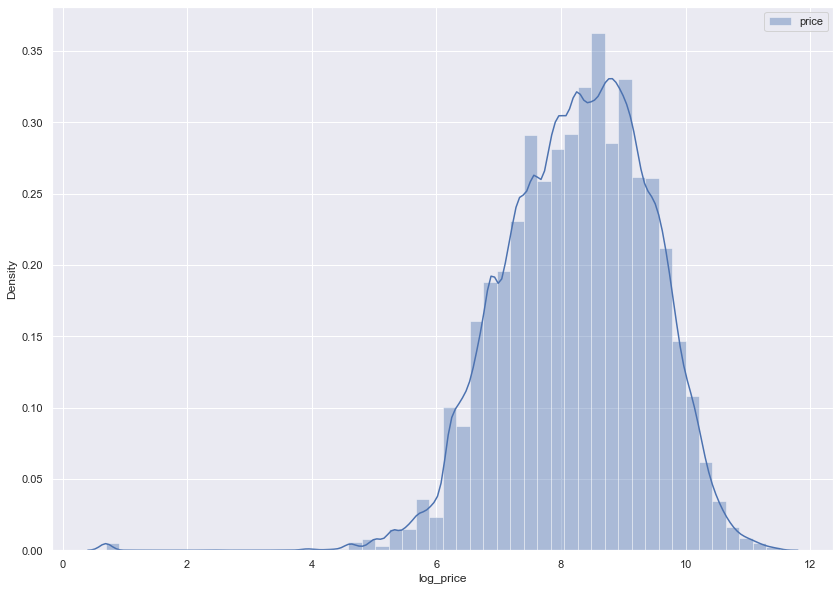

In [15]:
plt.figure(figsize=(14, 10))
sns.distplot(df['log_price'], label='price') 
plt.legend()

Выбросы есть. Как и в большую, так и в меньшую сторону. Есть автомобиль , ценой 1 долл. и есть автомобиль ценой 99999. Возьмем по квантилю от .01 и .99

/Users/alexanderskovorodko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


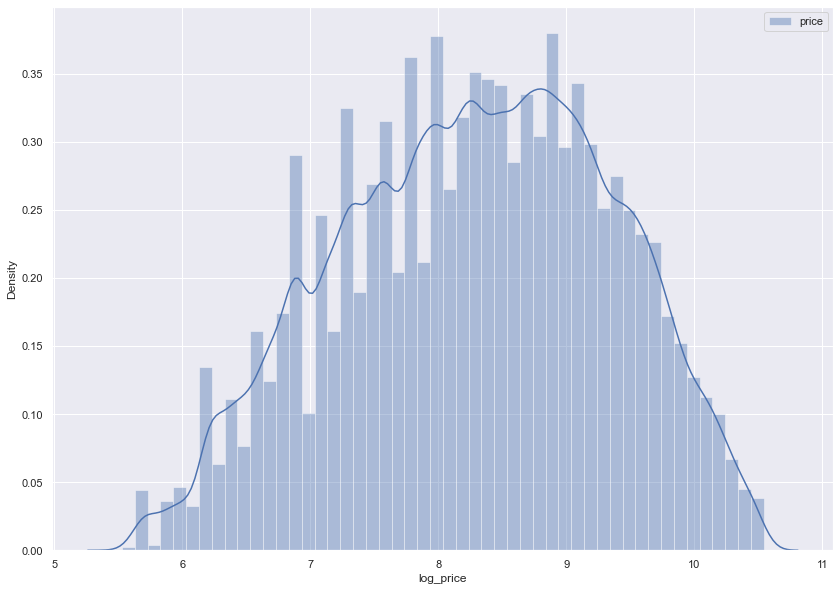

In [16]:
q_low = df["log_price"].quantile(0.01)
q_hi  = df["log_price"].quantile(0.99)
df = df[(df["log_price"] < q_hi) & (df["log_price"] > q_low)]
plt.figure(figsize=(14, 10))
sns.distplot(df['log_price'], label='price') 
plt.legend()

<AxesSubplot:>

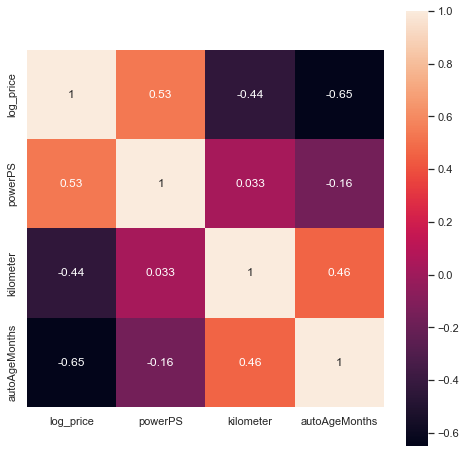

In [17]:
plt.figure(figsize=(8,8))
correlate = df[['log_price','powerPS','kilometer','autoAgeMonths']].corr() 
sns.heatmap(correlate, square=1,annot=True)

In [18]:
df.dtypes

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                  int64
log_price            float64
dtype: object

In [19]:
df['log_price'] = np.log1p(df['price'])
df.drop(['price'], axis=1, inplace=True)

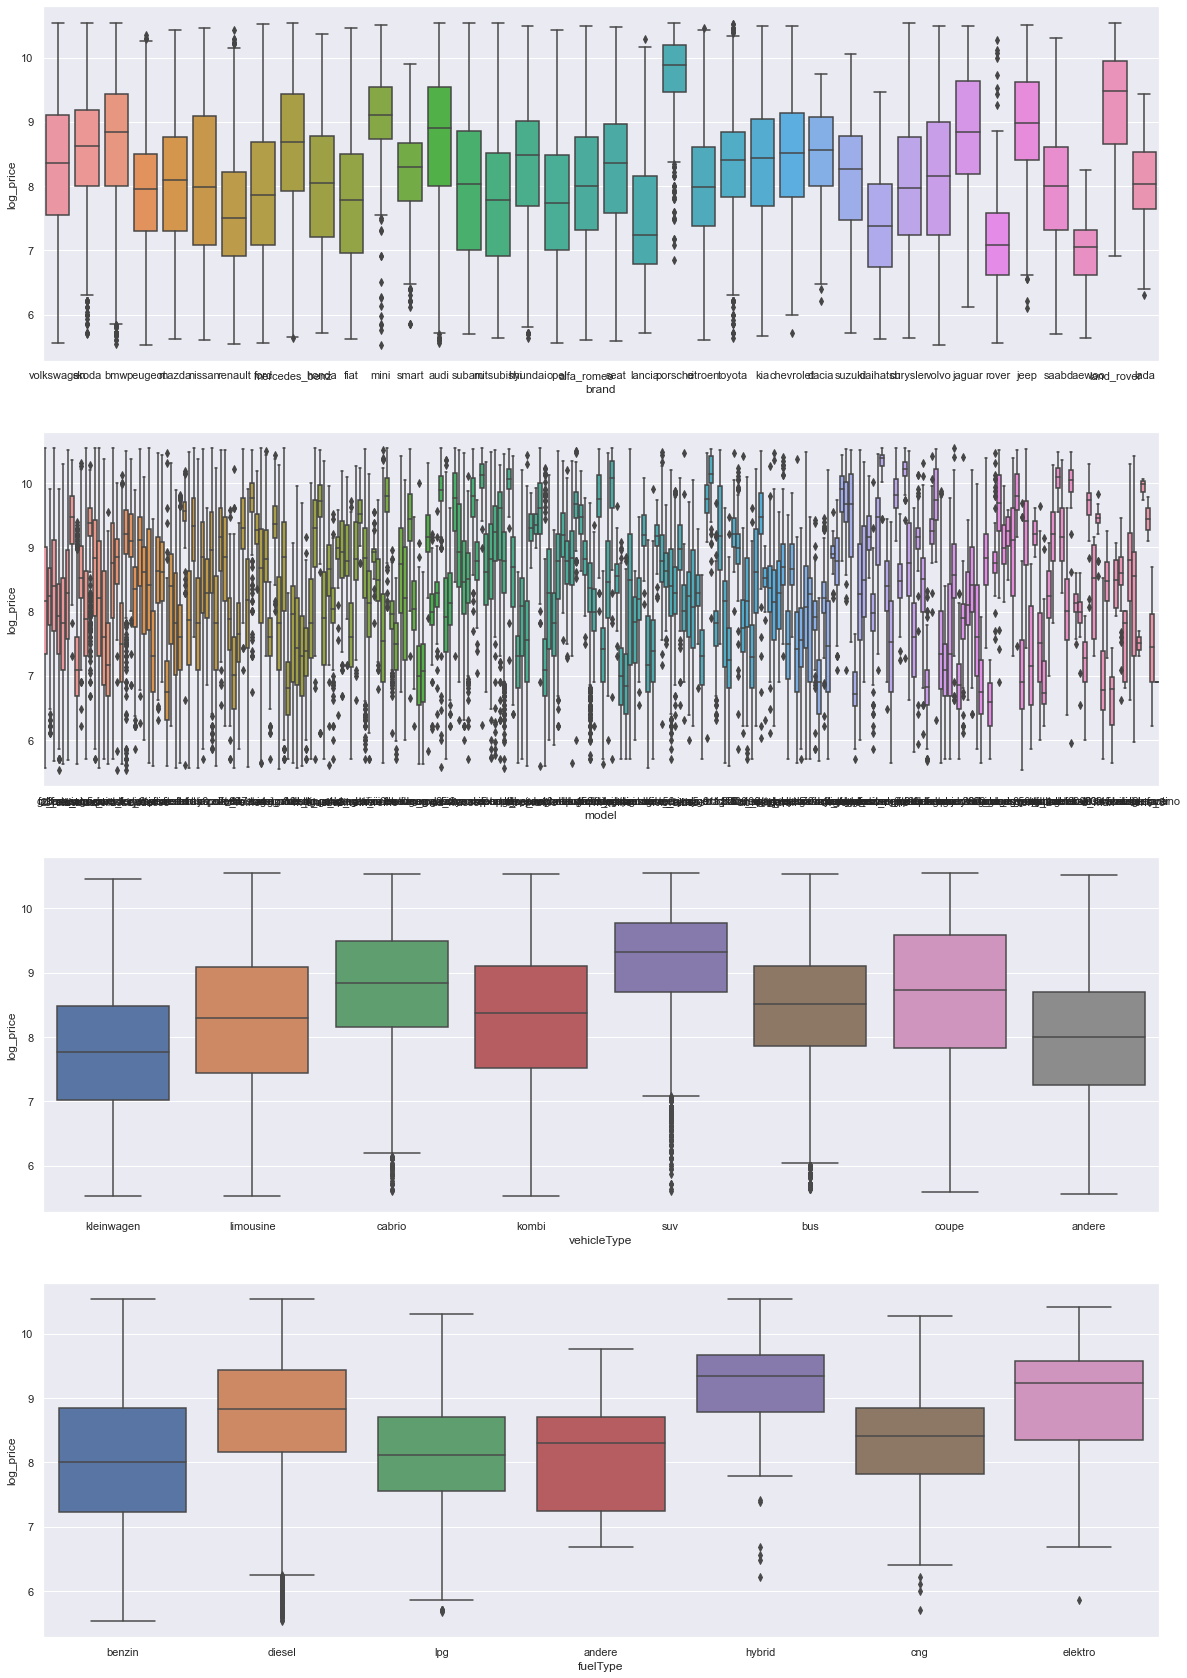

In [20]:
fig, ax = plt.subplots(nrows=4,figsize=(20, 30), sharey=False)

for i, feature in enumerate(categorical):
    sns.boxplot(x = feature, y = 'log_price', data = df, ax=ax[i])

plt.show()

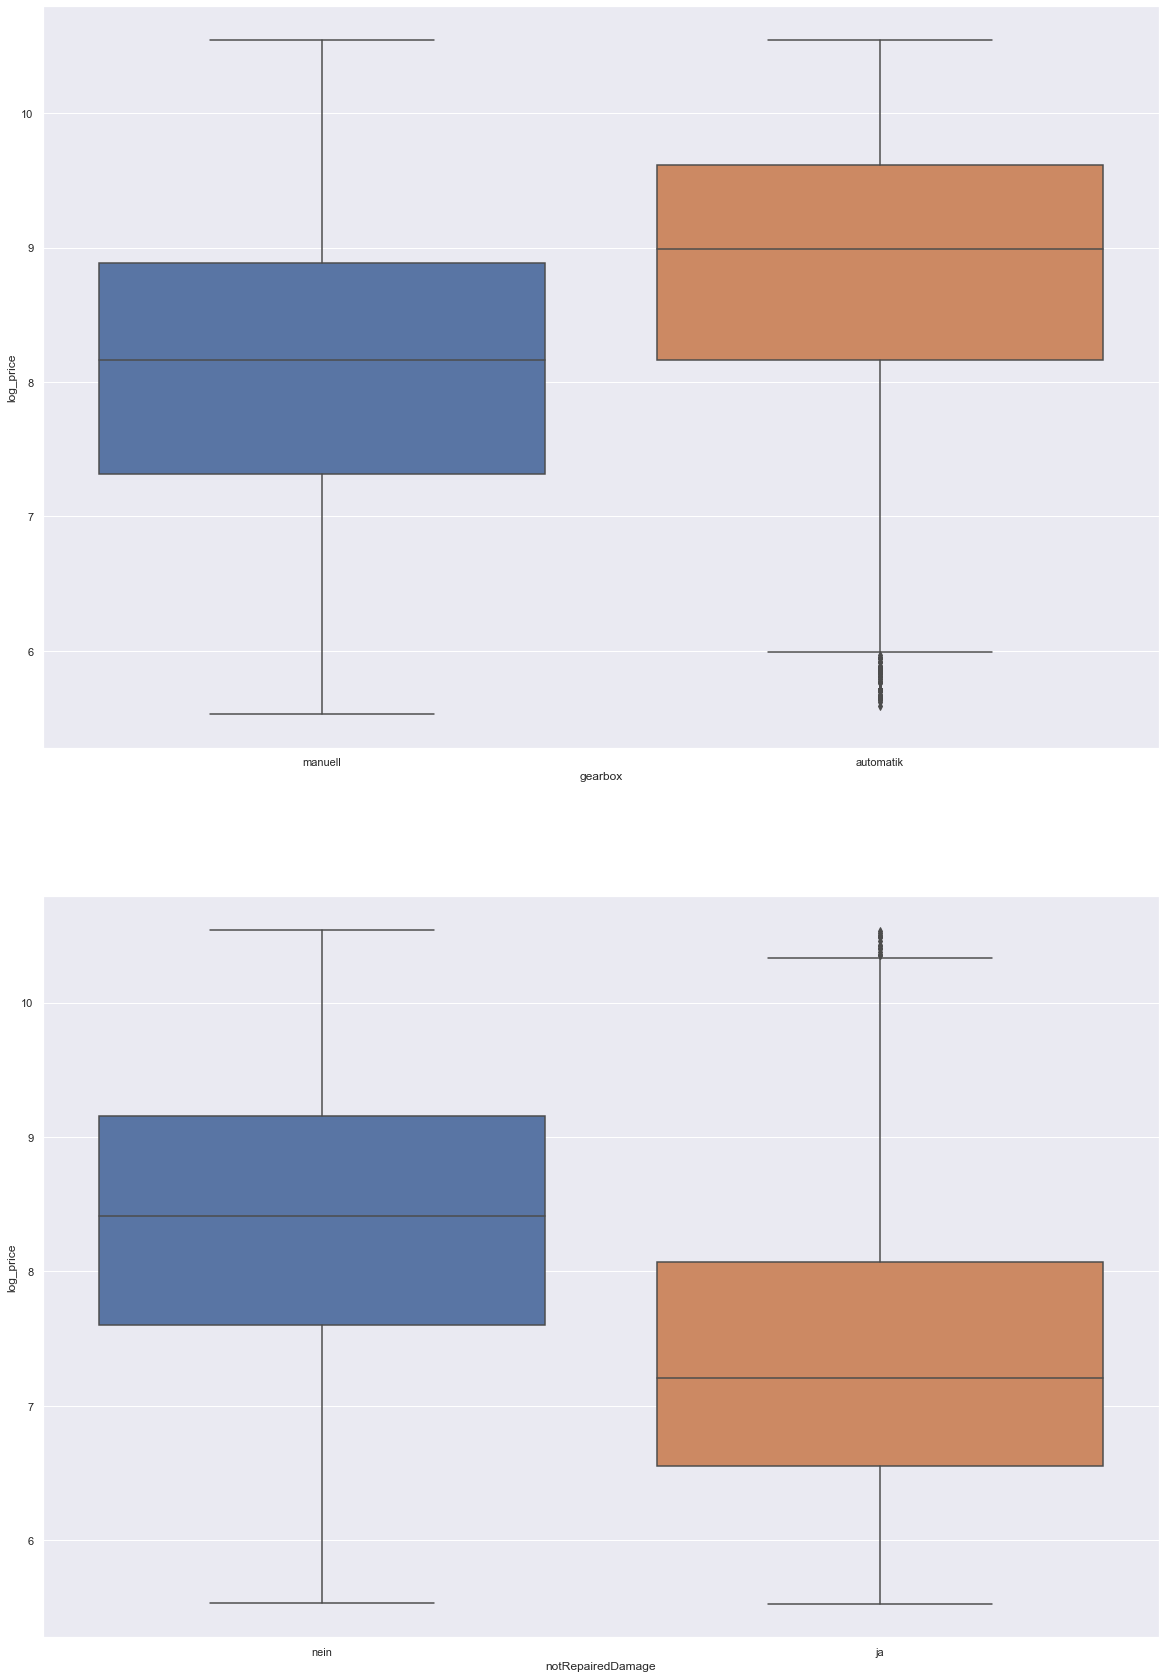

In [21]:
fig, ax = plt.subplots(nrows=2,figsize=(20, 30), sharey=False)
for i, feature in enumerate(binar):
    sns.boxplot(x = feature, y = 'log_price', data = df, ax=ax[i])

<Figure size 1800x720 with 0 Axes>

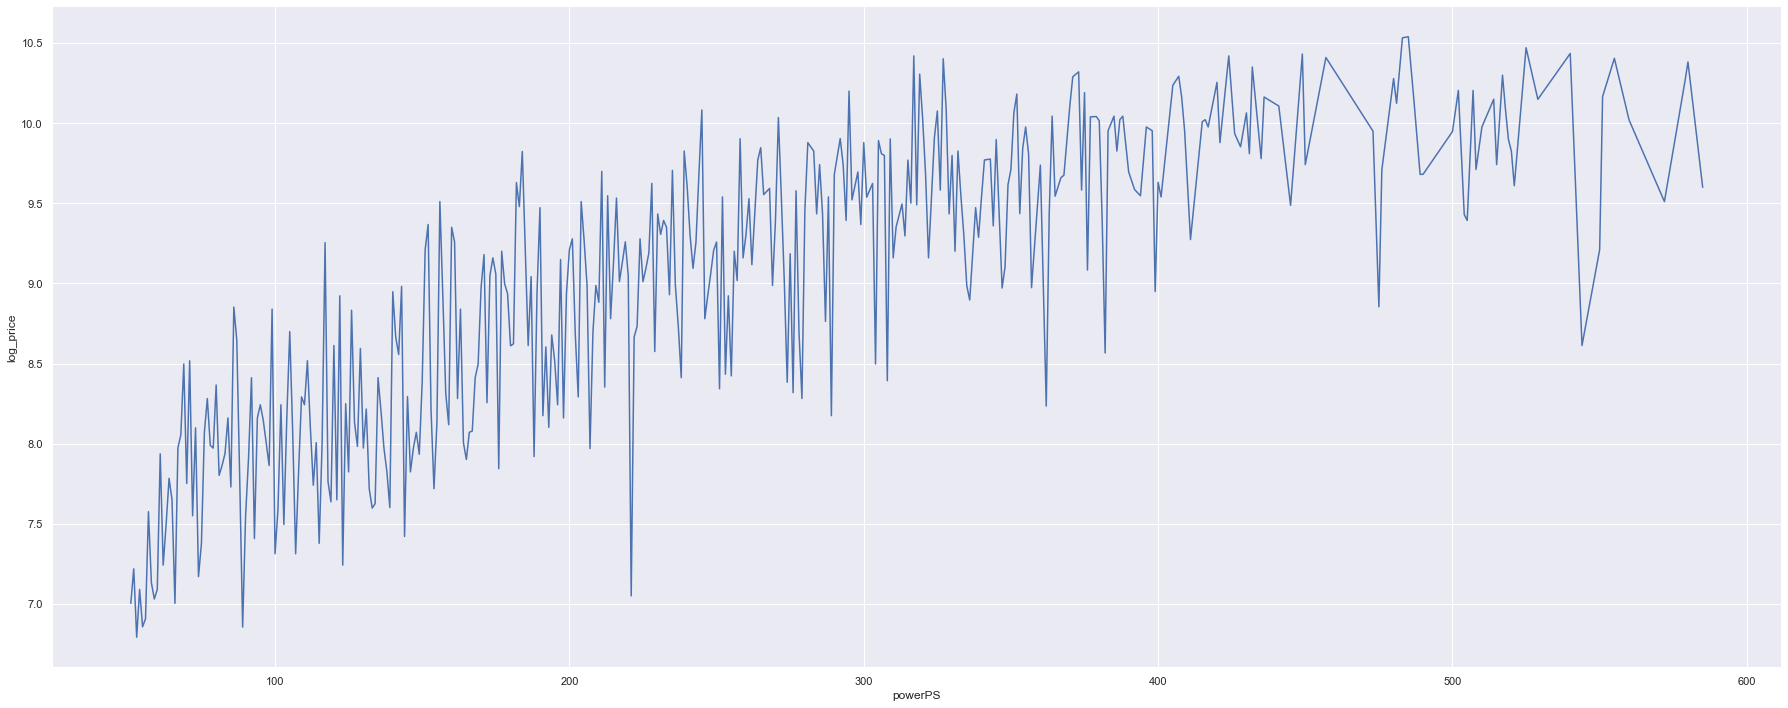

In [22]:
df_powerPS_price_med = df.groupby('powerPS').median()['log_price']
df_powerPS_price_med = df_powerPS_price_med.reset_index()
plt.figure(figsize=(25, 10))
sns.relplot(x = 'powerPS', y = 'log_price', data= df_powerPS_price_med, kind='line', height=10, aspect=2.5)

<Figure size 1800x720 with 0 Axes>

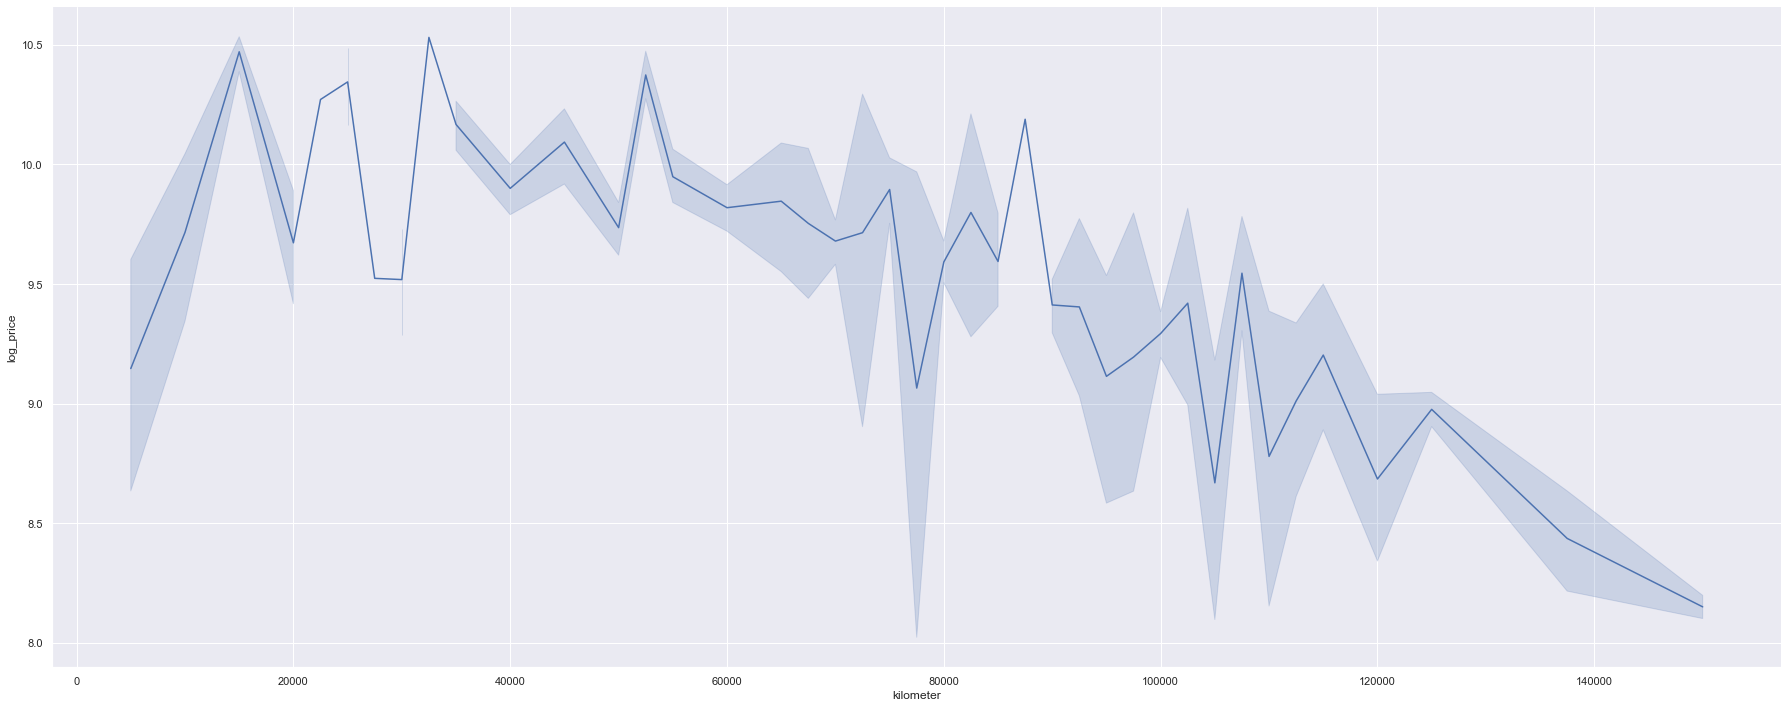

In [23]:
df_km_price_med = df.groupby('log_price').median()['kilometer']
df_km_price_med = df_km_price_med.reset_index()
plt.figure(figsize=(25, 10))
sns.relplot(x = 'kilometer', y = 'log_price', data= df_km_price_med, kind='line'
            , height=10, aspect=2.5)

<Figure size 1800x720 with 0 Axes>

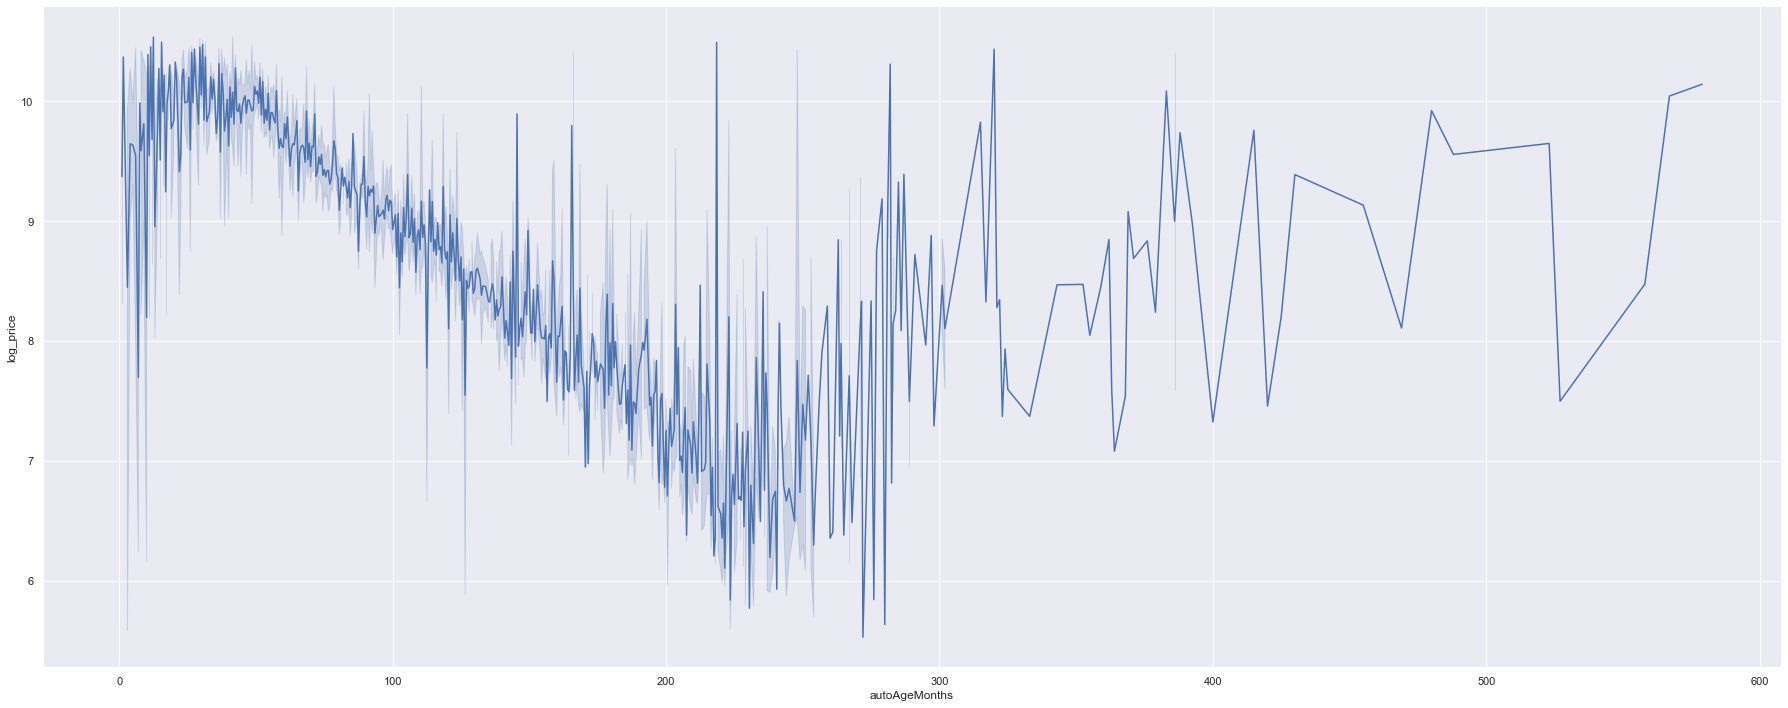

In [24]:
df_autoAgeMonths_price_med = df.groupby('log_price').median()['autoAgeMonths']
df_autoAgeMonths_price_med = df_autoAgeMonths_price_med.reset_index()
plt.figure(figsize=(25, 10))
sns.relplot(x = 'autoAgeMonths', y = 'log_price', data= df_autoAgeMonths_price_med, kind='line', height=10, aspect=2.5)

In [25]:
df.loc[:,'gearbox'] = np.where(df['gearbox'] == 'automatik', 1, 0)
df.loc[:,'notRepairedDamage'] = np.where(df['notRepairedDamage'] == 'ja', 1, 0)

In [26]:
df.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,log_price
0,volkswagen,golf,kleinwagen,0,benzin,0,75,150000,177,7.313887
1,skoda,fabia,kleinwagen,0,diesel,0,69,90000,93,8.188967
2,bmw,3er,limousine,0,benzin,1,102,150000,246,6.478510
3,peugeot,2_reihe,cabrio,0,benzin,0,109,150000,140,7.696667
4,mazda,3_reihe,limousine,0,benzin,0,105,150000,136,7.601402


In [27]:
x = df[categorical + numeric + binar]
y = df['log_price']


x['bias'] = 1
binar += ['bias']

In [28]:
x

,brand,model,vehicleType,fuelType,powerPS,kilometer,autoAgeMonths,gearbox,notRepairedDamage,bias
0,volkswagen,golf,kleinwagen,benzin,75,150000,177,0,0,1
1,skoda,fabia,kleinwagen,diesel,69,90000,93,0,0,1
2,bmw,3er,limousine,benzin,102,150000,246,0,1,1
3,peugeot,2_reihe,cabrio,benzin,109,150000,140,0,0,1
4,mazda,3_reihe,limousine,benzin,105,150000,136,0,0,1
...,...,...,...,...,...,...,...,...,...,...
241185,volkswagen,golf,limousine,diesel,140,150000,69,0,0,1
241186,seat,leon,limousine,benzin,225,150000,142,0,1,1
241187,smart,fortwo,cabrio,benzin,101,125000,192,1,0,1
241188,volkswagen,transporter,bus,diesel,102,150000,241,0,0,1


In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('binar',  'passthrough', binar),
])

x = column_transformer.fit_transform(x)
x

<236067x307 sparse matrix of type '<class 'numpy.float64'>'
	with 1966046 stored elements in Compressed Sparse Row format>

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=42)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, train_size=8/9, random_state=42)

In [31]:
print('x_test', x_test.shape)
print('x_train', x_train.shape)
print('x_cv', x_cv.shape)

x_test (23607, 307)
x_train (188853, 307)
x_cv (23607, 307)


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression
x.shape[1]

307

**Vanilla Gradient Descent**

In [33]:
loss_valid = []
lambdas = np.logspace(-3,-0.1,10)

for lambd in lambdas:
    
    descent_config = {
        'descent_name': 'full',
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_':  lambd
        }
    }

    regression = LinearRegression(
        descent_config=descent_config,
    )
    
    
    regression.fit(x_train, y_train.to_numpy());
    
    y_pred_cv = regression.predict(x_cv);
    loss_valid.append([regression, lambd, mean_squared_error(y_cv, y_pred_cv)])
    print('lambda = {}', 'MSE = {}'.format(lambd, mean_squared_error(y_cv, y_pred_cv)))
loss_valid = np.array(loss_valid)
algorithm, lambd_best = loss_valid[np.argmin(loss_valid[:,2])][0], \
                    loss_valid[np.argmin(loss_valid[:,2])][1]

print('best lambda is {}'.format(lambd_best))

# обучение на обуч выборке
algorithm.fit(x_train, y_train.to_numpy())

y_pred_test = algorithm.predict(x_test)
y_pred_train = algorithm.predict(x_train)
mse_on_test = mean_squared_error(y_test, y_pred_test,squared=False)
mse_on_train = mean_squared_error(y_train, y_pred_train,squared=False)
r2_score_on_test = r2_score(y_pred_test, y_test)
iterations = len(algorithm.loss_history)-1

print('MSE on test = {}'.format(mse_on_test))
print('MSE on train = {}'.format(mse_on_train))
print('r2 score on test = {}'.format(r2_score_on_test))
print('iterations numb = {}'.format(iterations))

vanilla_gradient_descent = algorithm.loss_history

lambda = {} MSE = 0.001
lambda = {} MSE = 0.002100014155708654
lambda = {} MSE = 0.004410059454176736
lambda = {} MSE = 0.009261187281287938
lambda = {} MSE = 0.019448624389373614
lambda = {} MSE = 0.0408423865267452
lambda = {} MSE = 0.08576958985908938
lambda = {} MSE = 0.1801173528334133
lambda = {} MSE = 0.37824899063893824
lambda = {} MSE = 0.7943282347242815
best lambda is 0.7943282347242815
MSE on test = 0.6000980886041518
MSE on train = 0.5949204995536213
r2 score on test = 0.5937526553704704
iterations numb = 59


**Stochastic**

In [34]:
loss_valid = []
lambdas = np.logspace(-3,-0.1,10)

for lambd in lambdas:
    
    descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_':  lambd
        }
    }

    regression = LinearRegression(
        descent_config=descent_config,
    )
    
    
    regression.fit(x_train, y_train.to_numpy());
    
    y_pred_cv = regression.predict(x_cv);
    loss_valid.append([regression, lambd, mean_squared_error(y_cv, y_pred_cv)])
    print('lambda = {}', 'MSE = {}'.format(lambd, mean_squared_error(y_cv, y_pred_cv)))
loss_valid = np.array(loss_valid)
algorithm, lambd_best = loss_valid[np.argmin(loss_valid[:,2])][0], \
                    loss_valid[np.argmin(loss_valid[:,2])][1]

print('best lambda is {}'.format(lambd_best))

# обучение на обуч выборке
algorithm.fit(x_train, y_train.to_numpy())

y_pred_test = algorithm.predict(x_test)
y_pred_train = algorithm.predict(x_train)
mse_on_test = mean_squared_error(y_test, y_pred_test,squared=False)
mse_on_train = mean_squared_error(y_train, y_pred_train,squared=False)
r2_score_on_test = r2_score(y_pred_test, y_test)
iterations = len(algorithm.loss_history)-1

print('MSE on test = {}'.format(mse_on_test))
print('MSE on train = {}'.format(mse_on_train))
print('r2 score on test = {}'.format(r2_score_on_test))
print('iterations numb = {}'.format(iterations))

stochastic_gradient_descent = algorithm.loss_history

lambda = {} MSE = 0.001
lambda = {} MSE = 0.002100014155708654
lambda = {} MSE = 0.004410059454176736
lambda = {} MSE = 0.009261187281287938
lambda = {} MSE = 0.019448624389373614
lambda = {} MSE = 0.0408423865267452
lambda = {} MSE = 0.08576958985908938
lambda = {} MSE = 0.1801173528334133
lambda = {} MSE = 0.37824899063893824
lambda = {} MSE = 0.7943282347242815
best lambda is 0.7943282347242815
MSE on test = 0.5579149937451167
MSE on train = 0.552918308781407
r2 score on test = 0.6131851797803494
iterations numb = 413


**momentum**

In [35]:
loss_valid = []
lambdas = np.logspace(-3,-0.1,10)

for lambd in lambdas:
    
    descent_config = {
        'descent_name': 'momentum',
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_':  lambd
        }
    }

    regression = LinearRegression(
        descent_config=descent_config,
    )
    
    
    regression.fit(x_train, y_train.to_numpy());
    
    y_pred_cv = regression.predict(x_cv);
    loss_valid.append([regression, lambd, mean_squared_error(y_cv, y_pred_cv)])
    print('lambda = {}', 'MSE = {}'.format(lambd, mean_squared_error(y_cv, y_pred_cv)))
loss_valid = np.array(loss_valid)
algorithm, lambd_best = loss_valid[np.argmin(loss_valid[:,2])][0], \
                    loss_valid[np.argmin(loss_valid[:,2])][1]

print('best lambda is {}'.format(lambd_best))

# обучение на обучающей выборке
algorithm.fit(x_train, y_train.to_numpy())

y_pred_test = algorithm.predict(x_test)
y_pred_train = algorithm.predict(x_train)
mse_on_test = mean_squared_error(y_test, y_pred_test,squared=False)
mse_on_train = mean_squared_error(y_train, y_pred_train,squared=False)
r2_score_on_test = r2_score(y_pred_test, y_test)
iterations = len(algorithm.loss_history)-1

print('MSE on test = {}'.format(mse_on_test))
print('MSE on train = {}'.format(mse_on_train))
print('r2 score on test = {}'.format(r2_score_on_test))
print('iterations numb = {}'.format(iterations))

momentum_gradient_descent = algorithm.loss_history

lambda = {} MSE = 0.001
lambda = {} MSE = 0.002100014155708654
lambda = {} MSE = 0.004410059454176736
lambda = {} MSE = 0.009261187281287938
lambda = {} MSE = 0.019448624389373614
lambda = {} MSE = 0.0408423865267452
lambda = {} MSE = 0.08576958985908938
lambda = {} MSE = 0.1801173528334133
lambda = {} MSE = 0.37824899063893824
lambda = {} MSE = 0.7943282347242815
best lambda is 0.7943282347242815
MSE on test = 0.5182212548369431
MSE on train = 0.5094925075211009
r2 score on test = 0.6876120556959759
iterations numb = 122


**adam**

In [36]:
loss_valid = []
lambdas = np.logspace(-3,-0.1,10)

for lambd in lambdas:
    
    descent_config = {
        'descent_name': 'adam',
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_': lambd
        }
    }

    regression = LinearRegression(
        descent_config=descent_config,
    )
    
    
    regression.fit(x_train, y_train.to_numpy());
    
    y_pred_cv = regression.predict(x_cv);
    loss_valid.append([regression, lambd, mean_squared_error(y_cv, y_pred_cv)])
    print('lambda = {}', 'MSE = {}'.format(lambd, mean_squared_error(y_cv, y_pred_cv)))
    
loss_valid = np.array(loss_valid)
algorithm, lambd_best = loss_valid[np.argmin(loss_valid[:,2])][0], \
                    loss_valid[np.argmin(loss_valid[:,2])][1]

print('best lambda is {}'.format(lambd_best))

# обучение на обучающей выборке
algorithm.fit(x_train, y_train.to_numpy())

y_pred_test = algorithm.predict(x_test)
y_pred_train = algorithm.predict(x_train)
mse_on_test = mean_squared_error(y_test, y_pred_test,squared=False)
mse_on_train = mean_squared_error(y_train, y_pred_train,squared=False)
r2_score_on_test = r2_score(y_pred_test, y_test)
iterations = len(algorithm.loss_history)-1

print('MSE on test = {}'.format(mse_on_test))
print('MSE on train = {}'.format(mse_on_train))
print('r2 score on test = {}'.format(r2_score_on_test))
print('iterations numb = {}'.format(iterations))

adam_gradient_descent = algorithm.loss_history

lambda = {} MSE = 0.001
lambda = {} MSE = 0.002100014155708654
lambda = {} MSE = 0.004410059454176736
lambda = {} MSE = 0.009261187281287938
lambda = {} MSE = 0.019448624389373614
lambda = {} MSE = 0.0408423865267452
lambda = {} MSE = 0.08576958985908938
lambda = {} MSE = 0.1801173528334133
lambda = {} MSE = 0.37824899063893824
lambda = {} MSE = 0.7943282347242815
best lambda is 0.7943282347242815
MSE on test = 0.4994110218819541
MSE on train = 0.4875821406836433
r2 score on test = 0.7146955598624751
iterations numb = 172


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

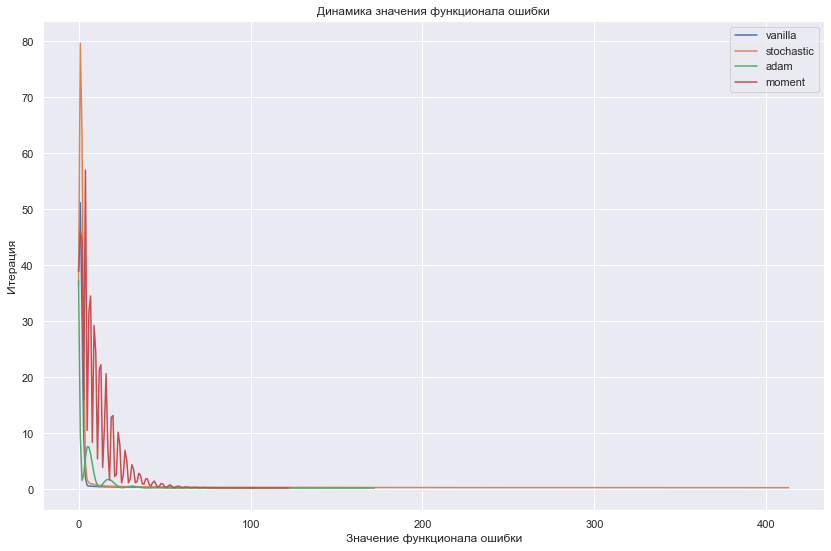

In [37]:
fig, ax = plt.subplots(figsize=(14, 9))
plt.plot(vanilla_gradient_descent, label="vanilla")
plt.plot(stochastic_gradient_descent, label="stochastic")
plt.plot(adam_gradient_descent, label="adam")
plt.plot(momentum_gradient_descent, label="moment")
plt.title('Динамика значения функционала ошибки')
plt.xlabel('Значение функционала ошибки')
plt.ylabel('Итерация')
plt.legend()
plt.show()

Самый долгий по времени спуск - *stohactics*. Обычный спуск по времени дольше чем *Moment* и *Adam*. Лучший по параметру MSE - test - это метод *Adam* [0.49906150512787073] . Худший по параметру MSE - test - это метод *Vanilla* [0.5917090171577466]. 

Аналогично с $R^2$. 


$R^2$ [*Adam*] = 0.7153451616928637


$R^2$ [*Vanilla*] = 0.6082426760917081

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [38]:
import time

In [39]:
batch_sizes = np.arange(5, 500, 10)
k = 10
RMSE_val = mean_squared_error(y_cv, regression.predict(x_cv.toarray()), squared=False)
loss_history = np.sqrt(regression.loss_history)

iterations_mean = []

for size in batch_sizes:
    for i in range(1,11):
        start_time = time.time()
        descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_': 0.7943282347242815, 
            'batch_size': size}}
        regression = LinearRegression(
        descent_config = descent_config)
    
    regression.fit(x_train, y_train.to_numpy())
    model = regression.predict(x_train.toarray())
    iterations_mean.append({'grad_estimate': str(size) + '_' + str(i), 'batch_size': size,
                    'mse_on_train': mse_on_train,
                    'RMSE_val': RMSE_val,
                    'mse_on_test': mse_on_test,
                    'num_of_iterations': len(regression.loss_history) - 1,
                    'loss_history': loss_history,
                    'R^2': r2_score(y_train, model),
                    'Time': time.time() - start_time})

    print('Done for stochastic gradient with batch size {} , iter {}.It took {}s'.format(size, i, time.time() - start_time))
    

Done for stochastic gradient with batch size 5 , iter 10.It took 1.259281873703003s
Done for stochastic gradient with batch size 15 , iter 10.It took 1.3182101249694824s
Done for stochastic gradient with batch size 25 , iter 10.It took 1.3085081577301025s
Done for stochastic gradient with batch size 35 , iter 10.It took 1.3203628063201904s
Done for stochastic gradient with batch size 45 , iter 10.It took 1.3186888694763184s
Done for stochastic gradient with batch size 55 , iter 10.It took 1.2756338119506836s
Done for stochastic gradient with batch size 65 , iter 10.It took 1.2567989826202393s
Done for stochastic gradient with batch size 75 , iter 10.It took 1.2537329196929932s
Done for stochastic gradient with batch size 85 , iter 10.It took 0.9996569156646729s
Done for stochastic gradient with batch size 95 , iter 10.It took 1.1713252067565918s
Done for stochastic gradient with batch size 105 , iter 10.It took 1.049346685409546s
Done for stochastic gradient with batch size 115 , iter 

In [40]:
creat_stochastic = pd.DataFrame(iterations_mean)
creat_stochastic_avg = creat_stochastic.drop(columns=['loss_history'])
creat_stochastic_avg = creat_stochastic.groupby('batch_size').agg('mean')
creat_stochastic_avg.head()

,mse_on_train,RMSE_val,mse_on_test,num_of_iterations,R^2,Time
batch_size,,,,,,
5,0.487582,0.488776,0.499411,300.0,0.512312,1.259277
15,0.487582,0.488776,0.499411,300.0,0.701827,1.318207
25,0.487582,0.488776,0.499411,300.0,0.712089,1.308503
35,0.487582,0.488776,0.499411,300.0,0.720244,1.320359
45,0.487582,0.488776,0.499411,300.0,0.718748,1.318685


Text(0, 0.5, 'Количество итераций')

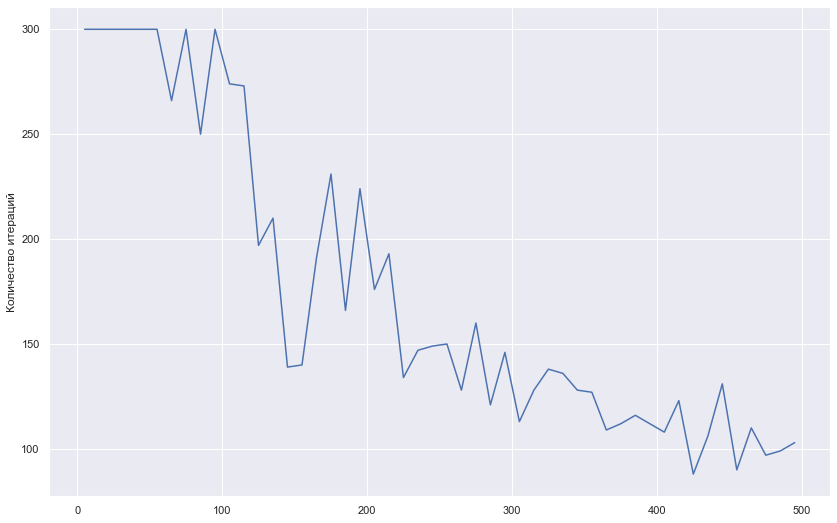

In [41]:
fig, ax = plt.subplots(figsize=(14, 9))
plt.plot(batch_sizes, creat_stochastic_avg['num_of_iterations'])
ax.set_ylabel('Количество итераций')

Text(0, 0.5, 'Среднее время итераций')

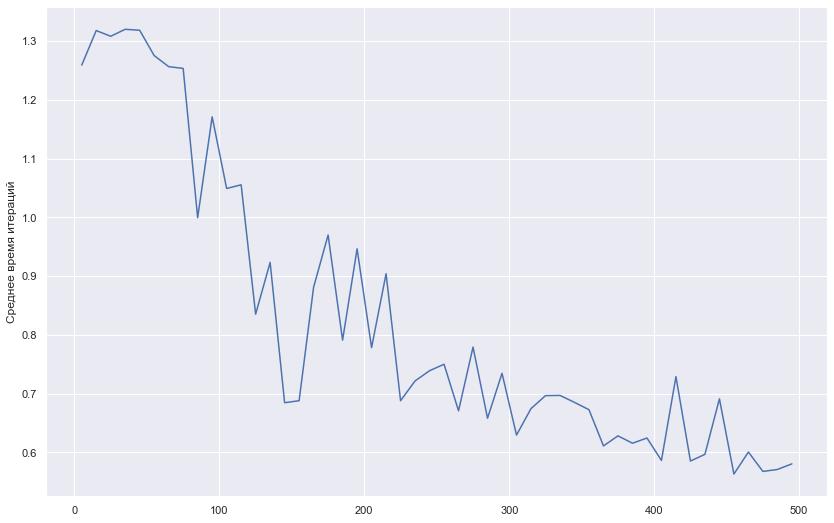

In [42]:
fig, ax = plt.subplots(figsize=(14, 9))
plt.plot(batch_sizes, creat_stochastic_avg['Time'])
ax.set_ylabel('Среднее время итераций')

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:  https://contest.yandex.ru/contest/29933/run-report/55520536/